In [29]:
cd ..

/home/tommy/Scrivania/Polimi


In [30]:
from games.goofspiel import build_goofspiel_tree
from data_structures.cfr_trees import CFRTree
from cfr_code.sample_cfr import SolveWithSampleCFR
from utilities.graphs import graphs_from_cfr_results

In [31]:
goofspiel_tree = build_goofspiel_tree(2, 3)

In [32]:
cfr_tree = CFRTree(goofspiel_tree)

In [33]:
%time res = SolveWithSampleCFR(cfr_tree, iterations = 1000000, bootstrap_iterations = 100000, \
                               show_perc = True, perc = 2, checkEveryIteration = 10000)

2.0%
4.0%
6.0%
8.0%
10.0%
12.0%
14.0%
16.0%
18.0%
20.0%
22.0%
24.0%
26.0%
28.0%
30.0%
32.0%
34.0%
36.0%
38.0%
40.0%
42.0%
44.0%
46.0%
48.0%
50.0%
52.0%
54.0%
56.0%
58.0%
60.0%
62.0%
64.0%
66.0%
68.0%
70.0%
72.0%
74.0%
76.0%
78.0%
80.0%
82.0%
84.0%
86.0%
88.0%
90.0%
92.0%
94.0%
96.0%
98.0%
100.0%
CPU times: user 15min 29s, sys: 156 ms, total: 15min 29s
Wall time: 15min 29s


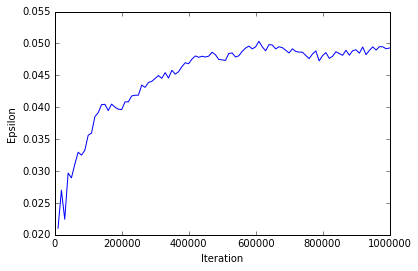

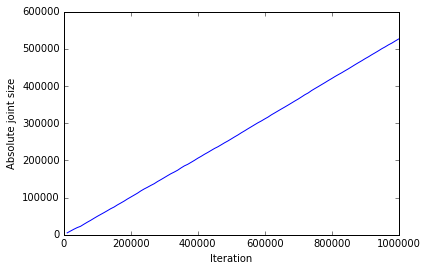

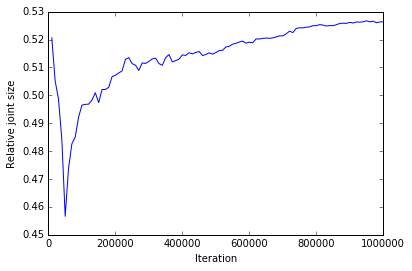

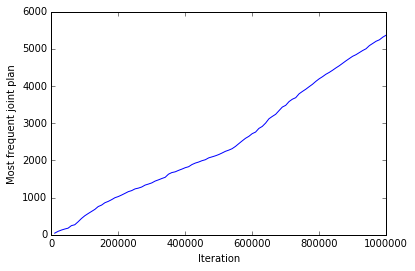

In [34]:
graphs_from_cfr_results(res)